In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

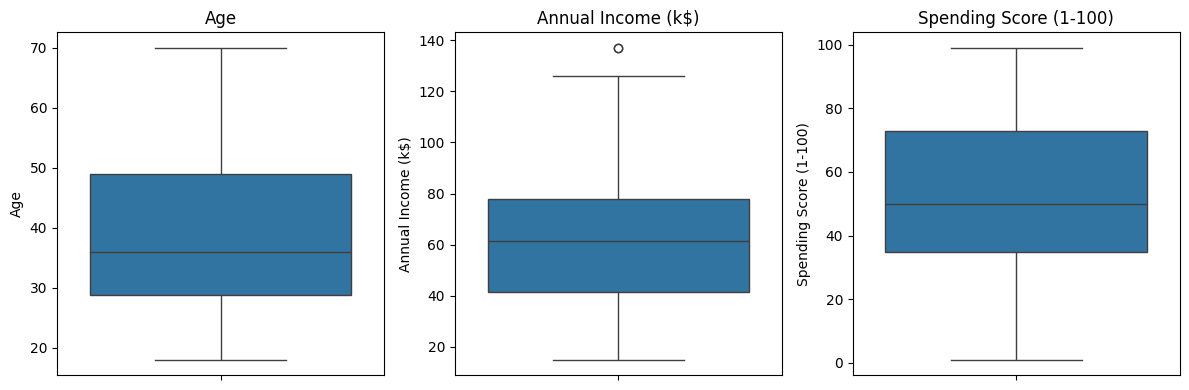

In [33]:
import seaborn as sns

plt.figure(figsize=(12,4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()

In [34]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(df['Annual Income (k$)'] >= Q1 - 1.5*IQR) & 
              (df['Annual Income (k$)'] <= Q3 + 1.5*IQR)]
df=df_clean
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


## Chuẩn Hóa dữ liệu

In [35]:
df['Age_Group'] = pd.cut(df_clean['Age'], 
                              bins=[18,25,35,50,70], 
                              labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Gender_Male
0,1,19,15,39,Young,True
1,2,21,15,81,Young,True
2,3,20,16,6,Young,False
3,4,23,16,77,Young,False
4,5,31,17,40,Adult,False
...,...,...,...,...,...,...
193,194,38,113,91,Middle-aged,False
194,195,47,120,16,Middle-aged,False
195,196,35,120,79,Adult,False
196,197,45,126,28,Middle-aged,False


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_scaled = scaler.fit_transform(df[features])

## Phân cụm với KMeans

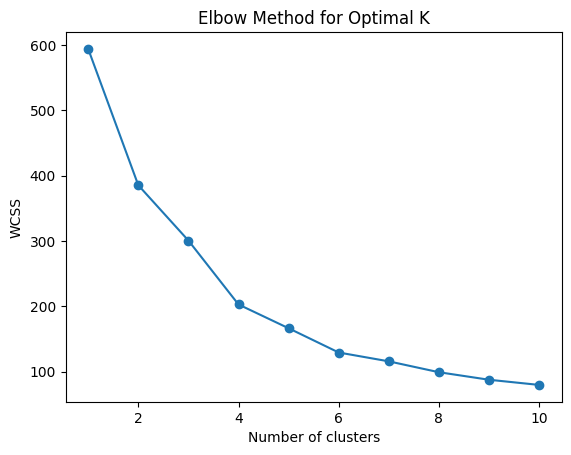

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Xác định số cụm tối ưu bằng Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Phân Cụm với DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Đếm số lượng cụm (loại bỏ nhiễu -1)
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
print(f"DBSCAN tìm thấy {n_clusters} cụm")

DBSCAN tìm thấy 5 cụm


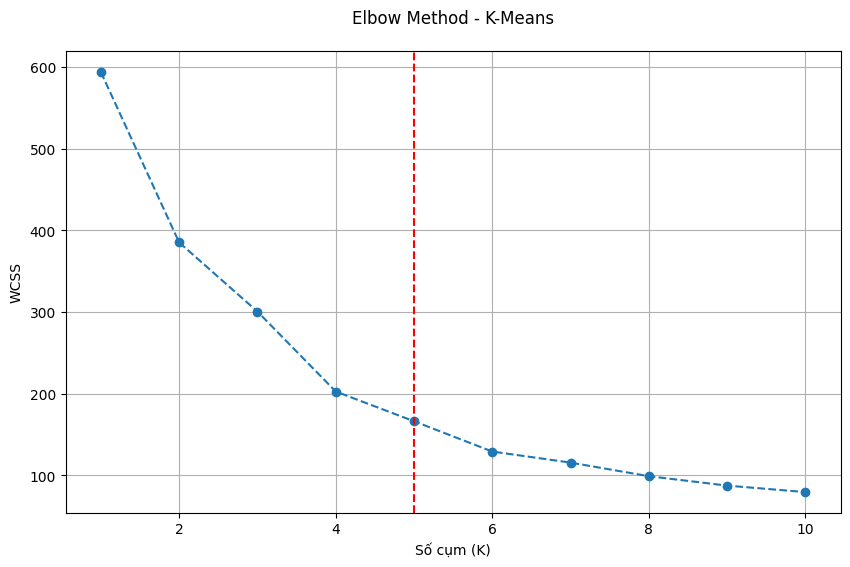

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.axvline(x=5, color='r', linestyle='--')
plt.title('Elbow Method - K-Means', pad=20)
plt.xlabel('Số cụm (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## Giảm chiều dữ liệu

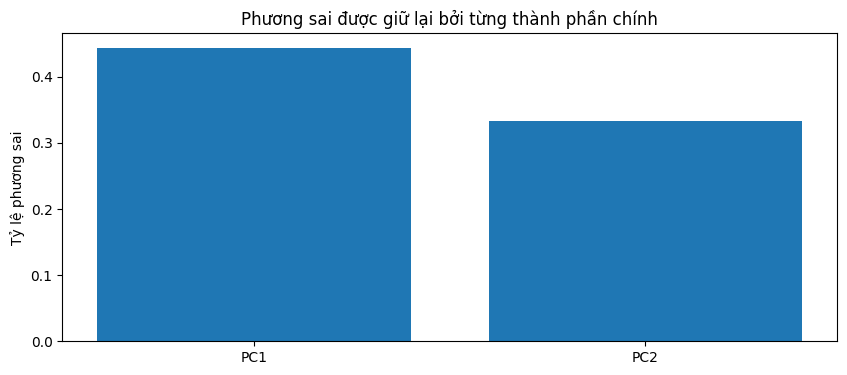

In [59]:
from sklearn.decomposition import PCA
# Giảm về 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize phương sai được giữ lại
plt.figure(figsize=(10,4))
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_)
plt.title('Phương sai được giữ lại bởi từng thành phần chính')
plt.ylabel('Tỷ lệ phương sai')
plt.show()

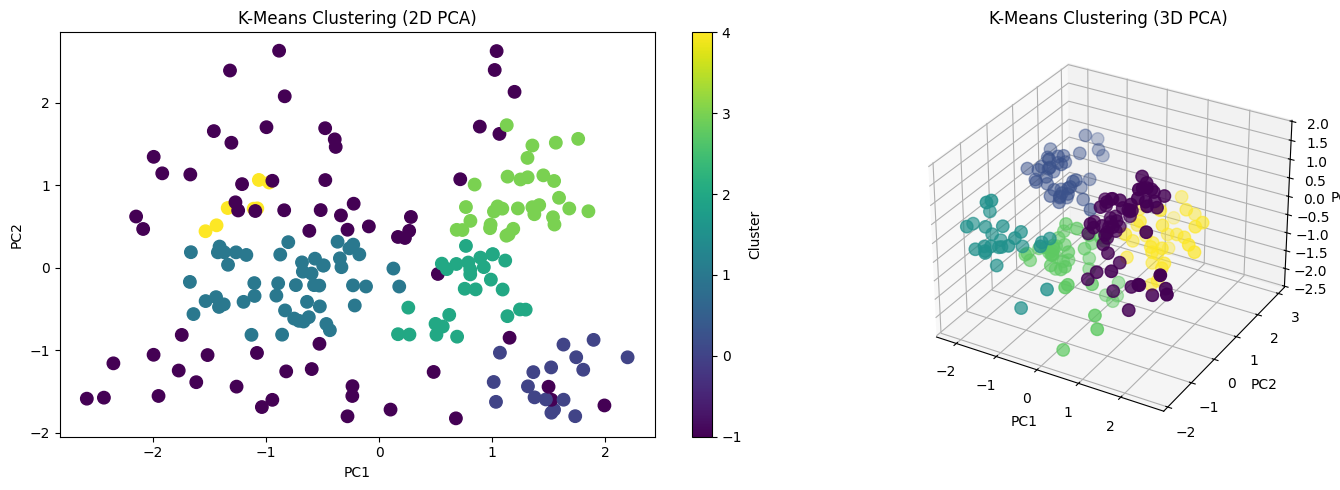

In [61]:
fig = plt.figure(figsize=(15,5))

# 2D Projection
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(X_pca[:,0], X_pca[:,1], c=clusters_dbscan, cmap='viridis', s=80)
plt.title('K-Means Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')

# 3D Projection
ax2 = fig.add_subplot(122, projection='3d')
scatter3d = ax2.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], 
                       c=clusters_kmeans, cmap='viridis', s=80)
ax2.set_title('K-Means Clustering (3D PCA)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
plt.tight_layout()

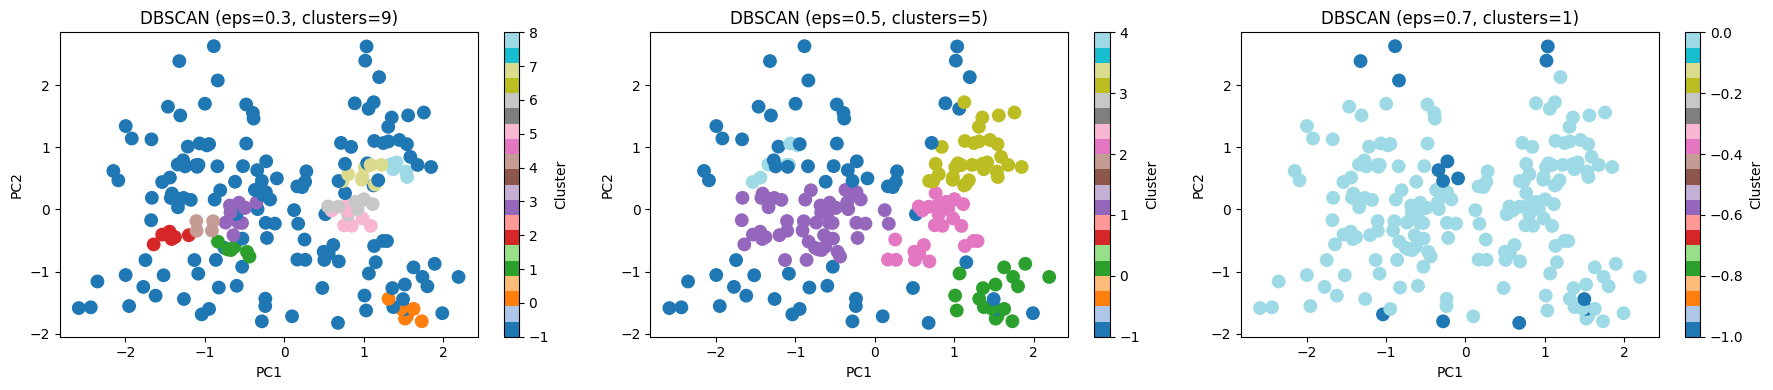

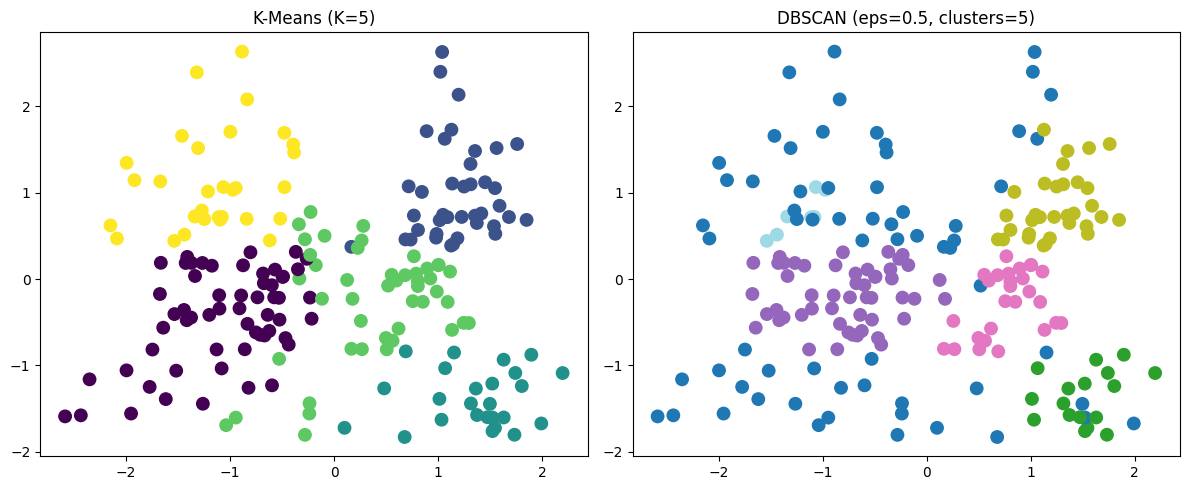

In [62]:
# Thử nghiệm với các giá trị eps khác nhau
eps_values = [0.3, 0.5, 0.7]
clusters_dbscan_dict = {}
n_clusters_dict = {}

plt.figure(figsize=(18,4))
for i, eps in enumerate(eps_values):
    # Huấn luyện DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)
    
    # Lưu kết quả
    clusters_dbscan_dict[eps] = clusters
    unique_clusters = set(clusters)
    n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
    n_clusters_dict[eps] = n_clusters
    
    # Vẽ biểu đồ
    plt.subplot(1, 3, i+1)
    scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab20', s=80)
    plt.title(f'DBSCAN (eps={eps}, clusters={n_clusters})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

# --- Bước 4: So sánh với K-Means ---
from sklearn.cluster import KMeans

# K-Means với K=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Visual comparison
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap='viridis', s=80)
plt.title('K-Means (K=5)')

plt.subplot(122)
best_eps = 0.5  # Chọn eps cho kết quả tốt nhất
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_dbscan_dict[best_eps], cmap='tab20', s=80)
plt.title(f'DBSCAN (eps={best_eps}, clusters={n_clusters_dict[best_eps]})')

plt.tight_layout()
plt.show()